In [1]:
#!/usr/bin/python
import csv
import time
import json
import talib
import requests
import numpy as np
import pandas as pd
from pandas.plotting import register_matplotlib_converters
from datetime import datetime, date, timedelta, timezone
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

In [2]:
headers = {'Content-Type': 'application/json'}
api_url_base = 'https://public.bitbank.cc'
pair = 'btc_jpy'
period = '1min'

today = datetime.today()
yesterday = today - timedelta(days=1)
today = "{0:%Y%m%d}".format(today)
yesterday = "{0:%Y%m%d}".format(yesterday)

In [3]:
def api_ohlcv(timestamp):
    api_url = '{0}/{1}/candlestick/{2}/{3}'.format(api_url_base, pair, period, timestamp)
    response = requests.get(api_url, headers=headers)

    if response.status_code == 200:
        ohlcv = json.loads(response.content.decode('utf-8'))['data']['candlestick'][0]['ohlcv']
        return ohlcv
    else:
        return None

In [4]:
ohlcv = api_ohlcv(yesterday)
open, high, low, close, volume, timestamp = [],[],[],[],[],[]
for i in ohlcv:
    open.append(int(i[0]))
    high.append(int(i[1]))
    low.append(int(i[2]))
    close.append(int(i[3]))
    volume.append(float(i[4]))
    time_str = str(i[5])
    timestamp.append(datetime.fromtimestamp(int(time_str[:10])).strftime('%Y/%m/%d %H:%M:%M'))

date_time_index = pd.to_datetime(timestamp) # convert to DateTimeIndex type
df = pd.DataFrame({'open': open, 'high': high, 'low': low, 'close': close}, index=date_time_index) # volume is not contained
# df.index += pd.offsets.Hour(9) # adjustment for JST
print(df.shape)
print(df.columns)
print(df.head(5))

(1440, 4)
Index(['open', 'high', 'low', 'close'], dtype='object')
                        open     high      low    close
2019-08-31 00:00:00  1019764  1019764  1019731  1019731
2019-08-31 00:01:01  1019528  1019528  1019527  1019528
2019-08-31 00:02:02  1019527  1019527  1019518  1019518
2019-08-31 00:03:03  1019500  1019506  1019390  1019390
2019-08-31 00:04:04  1019471  1019471  1019454  1019454


/opt/conda/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


2019-08-31 00:26:26:GOLDEN CROSS
2019-08-31 00:45:45:DEAD CROSS
2019-08-31 00:50:50:GOLDEN CROSS
2019-08-31 00:56:56:DEAD CROSS
2019-08-31 01:08:08:GOLDEN CROSS
2019-08-31 01:32:32:DEAD CROSS
2019-08-31 01:45:45:GOLDEN CROSS
2019-08-31 01:59:59:DEAD CROSS
2019-08-31 02:13:13:GOLDEN CROSS
2019-08-31 02:16:16:DEAD CROSS
2019-08-31 02:18:18:GOLDEN CROSS
2019-08-31 02:34:34:DEAD CROSS
2019-08-31 02:51:51:GOLDEN CROSS
2019-08-31 03:01:01:DEAD CROSS
2019-08-31 03:06:06:GOLDEN CROSS
2019-08-31 03:15:15:DEAD CROSS
2019-08-31 03:42:42:GOLDEN CROSS
2019-08-31 03:52:52:DEAD CROSS
2019-08-31 04:39:39:GOLDEN CROSS
2019-08-31 05:06:06:DEAD CROSS
2019-08-31 05:27:27:GOLDEN CROSS
2019-08-31 05:38:38:DEAD CROSS
2019-08-31 05:40:40:GOLDEN CROSS
2019-08-31 06:01:01:DEAD CROSS
2019-08-31 06:25:25:GOLDEN CROSS
2019-08-31 06:35:35:DEAD CROSS
2019-08-31 06:48:48:GOLDEN CROSS
2019-08-31 06:49:49:DEAD CROSS
2019-08-31 07:02:02:GOLDEN CROSS
2019-08-31 07:13:13:DEAD CROSS
2019-08-31 07:25:25:GOLDEN CROSS
2019-08

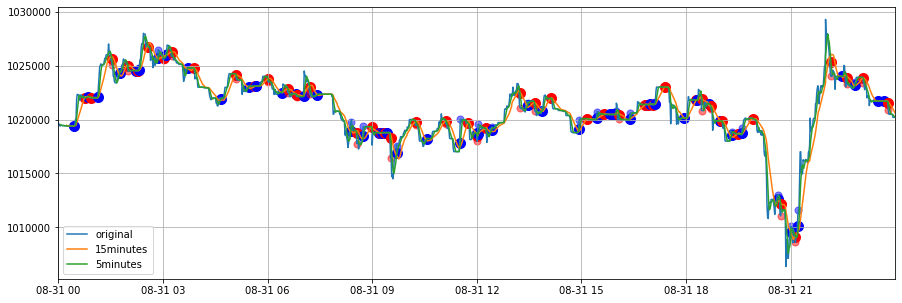

In [5]:
def SMA(df):
    df1 = df.copy()
    df1["ma5"] = df1.close.rolling(window=5).mean()
    df1["ma15"] = df1.close.rolling(window=15).mean()
    df1["diff"] = df1.ma5 - df1.ma15
    df1["unixtime"] = [datetime.timestamp(t) for t in df1.index]

    # line and Moving Average
    plt.figure(figsize=(15,5))
    plt.plot(df1.index, df1.close,label="original")
    plt.plot(df1.index, df1.ma15,label="15minutes")
    plt.plot(df1.index, df1.ma5,label="5minutes")
    plt.xlim(df1.index[0], df1.index[-1])
    plt.grid()

    # Cross points
    for i in range(1, len(df1)):
        if df1.iloc[i-1]["diff"] < 0 and df1.iloc[i]["diff"] > 0:
            print("{}:GOLDEN CROSS".format(df1.index[i]))
            plt.scatter(df1.index[i], df1.iloc[i]["ma5"], marker="o", s=100, color="b")
            plt.scatter(df1.index[i], df1.iloc[i]["close"], marker="o", s=50, color="b", alpha=0.5)

        if df1.iloc[i-1]["diff"] > 0 and df1.iloc[i]["diff"] < 0:
            print("{}:DEAD CROSS".format(df1.index[i]))
            plt.scatter(df1.index[i], df1.iloc[i]["ma5"], marker="o", s=100, color="r")
            plt.scatter(df1.index[i], df1.iloc[i]["close"], marker="o", s=50, color="r", alpha=0.5)
    plt.legend()

SMA(df)

2019-08-31 00:26:26:GOLDEN CROSS
2019-08-31 00:45:45:DEAD CROSS
2019-08-31 00:50:50:GOLDEN CROSS
2019-08-31 00:56:56:DEAD CROSS
2019-08-31 01:08:08:GOLDEN CROSS
2019-08-31 01:32:32:DEAD CROSS
2019-08-31 01:45:45:GOLDEN CROSS
2019-08-31 01:59:59:DEAD CROSS
2019-08-31 02:13:13:GOLDEN CROSS
2019-08-31 02:16:16:DEAD CROSS
2019-08-31 02:18:18:GOLDEN CROSS
2019-08-31 02:34:34:DEAD CROSS
2019-08-31 02:51:51:GOLDEN CROSS
2019-08-31 03:01:01:DEAD CROSS
2019-08-31 03:06:06:GOLDEN CROSS
2019-08-31 03:15:15:DEAD CROSS
2019-08-31 03:42:42:GOLDEN CROSS
2019-08-31 03:52:52:DEAD CROSS
2019-08-31 04:39:39:GOLDEN CROSS
2019-08-31 05:06:06:DEAD CROSS
2019-08-31 05:27:27:GOLDEN CROSS
2019-08-31 05:38:38:DEAD CROSS
2019-08-31 05:40:40:GOLDEN CROSS
2019-08-31 06:01:01:DEAD CROSS
2019-08-31 06:25:25:GOLDEN CROSS
2019-08-31 06:35:35:DEAD CROSS
2019-08-31 06:48:48:GOLDEN CROSS
2019-08-31 06:49:49:DEAD CROSS
2019-08-31 07:02:02:GOLDEN CROSS
2019-08-31 07:13:13:DEAD CROSS
2019-08-31 07:25:25:GOLDEN CROSS
2019-08

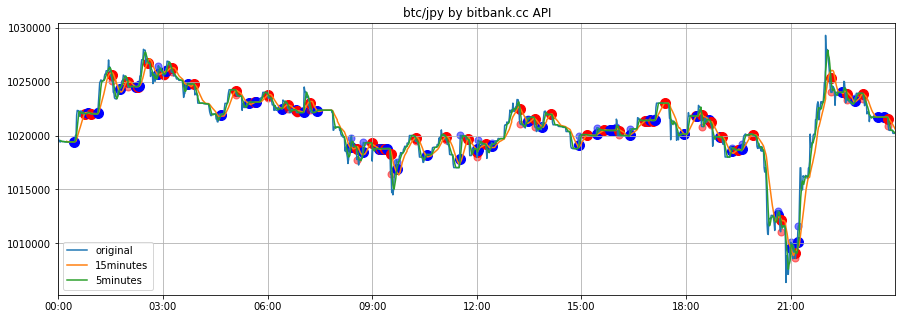

In [11]:
def SMA_TaLib(df):
    df1 = df.copy()
    df1["ma5"] = talib.SMA(pd.Series(df1['close']), timeperiod=5)
    df1["ma15"] = talib.SMA(pd.Series(df1['close']), timeperiod=15)
    df1["diff"] = df1.ma5 - df1.ma15
    df1["unixtime"] = [datetime.timestamp(t) for t in df1.index]

    # line and Moving Average
    fig = plt.figure(figsize=(15,5))
    ax = fig.add_subplot(1, 1, 1)
    ax.set_title('btc/jpy by bitbank.cc API')
    ax.plot(df1.index, df1.close,label="original")
    ax.plot(df1.index, df1.ma15,label="15minutes")
    ax.plot(df1.index, df1.ma5,label="5minutes")
    ax.set_xlim(df1.index[0], df1.index[-1])
    locator = mdates.AutoDateLocator()
    ax.xaxis.set_major_locator(locator)
    ax.xaxis.set_major_formatter(mdates.AutoDateFormatter(locator))
    ax.xaxis.set_major_formatter(DateFormatter('%H:%M'))
    ax.grid()

    # Cross points
    for i in range(1, len(df1)):
        if df1.iloc[i-1]["diff"] < 0 and df1.iloc[i]["diff"] > 0:
            print("{}:GOLDEN CROSS".format(df1.index[i]))
            ax.scatter(df1.index[i], df1.iloc[i]["ma5"], marker="o", s=100, color="b")
            ax.scatter(df1.index[i], df1.iloc[i]["close"], marker="o", s=50, color="b", alpha=0.5)

        if df1.iloc[i-1]["diff"] > 0 and df1.iloc[i]["diff"] < 0:
            print("{}:DEAD CROSS".format(df1.index[i]))
            ax.scatter(df1.index[i], df1.iloc[i]["ma5"], marker="o", s=100, color="r")
            ax.scatter(df1.index[i], df1.iloc[i]["close"], marker="o", s=50, color="r", alpha=0.5)
    ax.legend()

SMA_TaLib(df)

In [39]:
close = pd.Series(df['close'])

# Simple Moving Average
sma = talib.SMA(close, timeperiod=5)

# Exponential Moving Average
ema = talib.EMA(close, timeperiod=5)

# Bollinger Bands
bbands = talib.BBANDS(close)

# Momentum
momentam = talib.MOM(close, timeperiod=10)

# MACD
macd = talib.MACD(close, fastperiod=12, slowperiod=26, signalperiod=9)

# RSI
rsi = talib.RSI(close, timeperiod=9)

print(type(sma))
print(sma.shape)
print(sma.head(5))

<class 'pandas.core.series.Series'>
(288,)
2019-08-30 00:00:00          NaN
2019-08-30 00:05:05          NaN
2019-08-30 00:10:10          NaN
2019-08-30 00:15:15          NaN
2019-08-30 00:20:20    1009513.4
dtype: float64


In [6]:
df_ = df.copy()
df_.columns = ['Close','Open','High','Low']
print(df_.columns)

Index(['Close', 'Open', 'High', 'Low'], dtype='object')


In [7]:
from backtesting import Strategy
from backtesting.lib import crossover

def SMA_Backtesting(values, n):
    """
    Return simple moving average of `values`, at
    each step taking into account `n` previous values.
    """
    close = pd.Series(values)
    return talib.SMA(close, timeperiod=n)

class SmaCross(Strategy):
    
    # Define the two MA lags as *class variables*
    # for later optimization
    n1 = 5
    n2 = 15
    
    def init(self):
        # Precompute two moving averages
        self.sma1 = self.I(SMA_Backtesting, self.data['Close'], self.n1)
        self.sma2 = self.I(SMA_Backtesting, self.data['Close'], self.n2)
    
    def next(self):
        # If sma1 crosses above sma2, buy the asset
        if crossover(self.sma1, self.sma2):
            self.buy()

        # Else, if sma1 crosses below sma2, sell it
        elif crossover(self.sma2, self.sma1):
            self.sell()

/opt/conda/lib/python3.7/site-packages/backtesting/_plotting.py:34: UserWarning: Jupyter Notebook detected. Setting Bokeh output to notebook. This may not work in Jupyter clients without JavaScript support (e.g. PyCharm, Spyder IDE). Reset with `bokeh.io.reset_output()`.
  warnings.warn('Jupyter Notebook detected. '


Loading BokehJS ...

In [8]:
from backtesting import Backtest

bt = Backtest(df_, SmaCross, cash=1, commission=.002)
bt.run()

Start                     2019-08-31 00:00:00
End                       2019-08-31 23:59:59
Duration                      0 days 23:59:59
Exposure [%]                          96.7523
Equity Final [$]                     0.836272
Equity Peak [$]                        1.0008
Return [%]                           -16.3728
Buy & Hold Return [%]               0.0428531
Max. Drawdown [%]                    -16.5618
Avg. Drawdown [%]                   -0.203615
Max. Drawdown Duration        0 days 00:06:06
Avg. Drawdown Duration        0 days 00:06:06
# Trades                                   98
Win Rate [%]                          6.12245
Best Trade [%]                       0.977811
Worst Trade [%]                     -0.440477
Avg. Trade [%]                       -0.18195
Max. Trade Duration           0 days 00:58:59
Avg. Trade Duration           0 days 00:14:13
Expectancy [%]                       0.217442
SQN                                   -10.715
Sharpe Ratio                      

In [9]:
stats = bt.optimize(n1=range(3, 10, 1),
                    n2=range(5, 30, 5),
                    maximize='Equity Final [$]',
                    constraint=lambda p: p.n1 < p.n2)
print(stats)

Start                      2019-08-31 00:00:00
End                        2019-08-31 23:59:59
Duration                       0 days 23:59:59
Exposure [%]                           94.3518
Equity Final [$]                      0.878007
Equity Peak [$]                        1.00026
Return [%]                            -12.1993
Buy & Hold Return [%]                0.0428531
Max. Drawdown [%]                     -12.4675
Avg. Drawdown [%]                    -0.199699
Max. Drawdown Duration         0 days 00:04:04
Avg. Drawdown Duration         0 days 00:04:04
# Trades                                    65
Win Rate [%]                           7.69231
Best Trade [%]                         1.02605
Worst Trade [%]                      -0.429489
Avg. Trade [%]                       -0.201385
Max. Trade Duration            0 days 00:58:59
Avg. Trade Duration            0 days 00:20:55
Expectancy [%]                         0.25358
SQN                                   -7.94007
Sharpe Ratio 